# This is the main script for Enron email classification

<h2> Run extraction.ipynb before running this script </h2>

<h2> Importing Libraries and Feature extraction scripts <\h2>

In [1]:
import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()

In [4]:
# Libraries
import nltk
import spacy
import en_core_web_lg
import pandas as pd
import numpy as np
import statistics
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Feature Extraction Scripts
import extract_email_info
import processing
import sentence_feature_extraction, character_feature_extraction, punctuation_feature_extraction, paragraph_feature_extraction
import word_feature_extraction, word_feature_ttr, syntactic_feature_extraction, semantic_feature_extraction
nlp = en_core_web_lg.load()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Read extracted csv file which contains preprocessed data

In [ ]:
df_email = pd.read_csv("Extracted_emails.csv")

### Extract email info and parse it into different columns

In [2]:

# Uncomment the below 2 lines to generate parsed_emails.csv
#extract_email_info.extract_info(df_email)
#df_email.to_csv("parsed_emails.csv")


df_email = pd.read_csv("parsed_emails.csv")
df_email = df_email.loc[:, ~df_email.columns.str.contains('^Unnamed')]
print ("Shape of DataFrame")
print (df_email.shape)
print ("-----------------------------Email Information---------------------------------------------")
df_email.head(5)

Shape of DataFrame
(412613, 20)
-----------------------------Email Information---------------------------------------------


,File_id,Message-ID,Date,From,To,Subject,Cc,Mime-Version,Content-Type,Content-Transfer-Encoding,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,dataset/saibi-e/saibi-e_40,<16579932.1075851700252.JavaMail.evans@thyme>,"Sat, 20 Jan 2001 01:33:00 -0800 (PST)",frozenset({'esaibi@hotmail.com'}),frozenset({'eric.saibi@enron.com'}),_0101,esaibi@hotmail.com,1.0,text/plain; charset=us-ascii,7bit,esaibi@hotmail.com,"""Eric Saibi"" <esaibi@hotmail.com>",eric.saibi@enron.com,esaibi@hotmail.com,NaN,\Eric_Saibi_Nov2001\Notes Folders\Discussion t...,SAIBI-E,esaibi.nsf,File attached\n\n_____________________________...,saibi-e
1,dataset/saibi-e/saibi-e_21,<25967242.1075855152517.JavaMail.evans@thyme>,"Sat, 29 Dec 2001 05:32:29 -0800 (PST)",frozenset({'al@friedwire.com'}),"frozenset({'eric.saibi@enron.com', 'seung-taek...",ERCOT Daily Data for 12-28-2001,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,Al@friedwire.com@ENRON,"Williams, Ryan </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,"\Eric_Saibi_Jan2002\Saibi, Eric\Deleted Items",Saibi-E,esaibi (Non-Privileged).pst,Enjoy!\n - 20011228ERCOT_LOAD.XLS \n - 2001122...,saibi-e
2,dataset/saibi-e/saibi-e_63,<9232754.1075841498702.JavaMail.evans@thyme>,"Fri, 1 Jun 2001 06:18:18 -0700 (PDT)",frozenset({'l..day@enron.com'}),"frozenset({'mike.curry@enron.com', 'thane.twig...",ERCOT RESPONSIBILITY TRANSFERS AND DYNAMIC SHE...,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,"Day, Smith L. </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Miller, Jeffrey </O=ENRON/OU=NA/CN=RECIPIENTS/...",NaN,NaN,"\ExMerge - Saibi, Eric\Saved",SAIBI-E,eric saibi 6-26-02.PST,"When: Wednesday, June 06, 2001 9:30 AM-3:30 PM...",saibi-e
3,dataset/saibi-e/saibi-e_76,<28246360.1075841499265.JavaMail.evans@thyme>,"Fri, 21 Dec 2001 09:13:32 -0800 (PST)",frozenset({'eric.saibi@enron.com'}),frozenset({'daniel.muschar@enron.com'}),RE: request,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,"Saibi, Eric </O=ENRON/OU=NA/CN=RECIPIENTS/CN=E...","Muschar, Daniel </O=ENRON/OU=NA/CN=RECIPIENTS/...",NaN,NaN,"\ExMerge - Saibi, Eric\Sent Items",SAIBI-E,eric saibi 6-26-02.PST,"Hey there,\n\nI'd like to get that cable if yo...",saibi-e
4,dataset/saibi-e/saibi-e_87,<2427938.1075852294176.JavaMail.evans@thyme>,"Tue, 9 Oct 2001 15:04:51 -0700 (PDT)",frozenset({'eric.saibi@enron.com'}),frozenset({'stephanie.sever@enron.com'}),RE: EnronOnline Desk to Desk ID and Password,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,"Saibi, Eric </O=ENRON/OU=NA/CN=RECIPIENTS/CN=E...","Sever, Stephanie </O=ENRON/OU=NA/CN=RECIPIENTS...",NaN,NaN,"\ESAIBI (Non-Privileged)\Saibi, Eric\Sent Items",SAIBI-E,ESAIBI (Non-Privileged).pst,Thanks!\n\n\n -----Original Message-----\nFrom...,saibi-e


### Pick top 10 users with most emails

In [3]:
s = df_email[["content","user"]].groupby(["user"])["content"].agg('count').nlargest(10)
s

user
kaminski-v      25891
mann-k          22341
dasovich-j      19646
kean-s          16026
shackleton-s    14290
jones-t         13898
farmer-d        12832
germany-c       11545
beck-s          10669
symes-k          9708
Name: content, dtype: int64

### Let's pick top 10 users based on number of emails and create dataframe for the same and store it into csv for future reference

In [4]:
# Selecting top 10 Users
df_email_subset = pd.DataFrame()
df_email_subset = df_email.groupby('user').filter(lambda x: len(x) > 9700)

# Reducing other columns
new_df_email = df_email_subset[['user','Message-ID','content']]
new_df_email.head()
#new_df_email["doc"] = new_df_email.content.apply(nlp)
#new_df_email.to_csv("users.csv")


,user,Message-ID,content
50298,germany-c,<25069561.1075853799771.JavaMail.evans@thyme>,Call me $
50299,germany-c,<30565676.1075845146575.JavaMail.evans@thyme>,"Chris,\n\nPlease extend this deal to 12/31/00...."
50300,germany-c,<22843742.1075853701854.JavaMail.evans@thyme>,The Unify tables are updated for the fuel chan...
50301,germany-c,<10021489.1075853845389.JavaMail.evans@thyme>,I'm a bad person. I forgot to tell you I sold...
50302,germany-c,<4513779.1075853857752.JavaMail.evans@thyme>,"After talking to Victor, he said this was the ..."


<h2> Preprocessing the content and removing forward chains from the emails </h2>

In [5]:
df=pd.read_csv('users.csv')
df=df.join(df.content.apply(processing.new_content))
df=df[df['new_content']!=""]
df=df[['user','Message_id','new_content']]
df.to_csv("processed.csv")

Index(['Unnamed: 0', 'user', 'Message-ID', 'content', 'doc', 'new_content'], dtype='object')

<h2> Add doc column </h2>

In [9]:
df_email=pd.read_csv("processed.csv")
#df_email["doc"] = df_email.new_content.apply(nlp)
df_email.to_csv("final_processed.csv")

Index(['Unnamed: 0', 'user', 'Message-ID', 'new_content'], dtype='object')

<h2> Sentence Based Features </h2>

In [2]:
new_df_email=pd.read_csv("final_processed.csv")
new_df_email.shape
new_df_email = new_df_email.join(new_df_email.new_content.apply(sentence_feature_extraction.extract_sentence_based_features))
new_df_email.to_csv("sentence_feature_.csv")
new_df_email.head(2)

,Unnamed: 0,user,Message-ID,new_content,doc,nr_sentences,avg_number_of_words_per_sent,std_deviation_len
0,0,germany-c,<25069561.1075853799771.JavaMail.evans@thyme>,Call me $,Call me $,1.0,2.000000,0.000000
1,1,germany-c,<30565676.1075845146575.JavaMail.evans@thyme>,"Chris,\n\nPlease extend this deal to 12/31/00....","Chris,\n\nPlease extend this deal to 12/31/00....",3.0,3.333333,3.785939


<h2> Character Based Features </h2>

In [3]:
new_df_email = pd.read_csv("sentence_feature_.csv")
new_df_email = new_df_email.join(new_df_email.new_content.apply(character_feature_extraction.extract_character_based_features))
new_df_email.to_csv("character_feature_.csv")
new_df_email.head(2)

,Unnamed: 0,Unnamed: 0.1,user,Message-ID,new_content,doc,nr_sentences,avg_number_of_words_per_sent,std_deviation_len,nr_chars,nr_alphabet,nr_upper,nr_lower,nr_numerics,nr_spaces,nr_punctuation
0,0,0,germany-c,<25069561.1075853799771.JavaMail.evans@thyme>,Call me $,Call me $,1.0,2.000000,0.000000,7,6,1,5,0,2,1
1,1,1,germany-c,<30565676.1075845146575.JavaMail.evans@thyme>,"Chris,\n\nPlease extend this deal to 12/31/00....","Chris,\n\nPlease extend this deal to 12/31/00....",3.0,3.333333,3.785939,84,55,5,50,18,20,11


<h2> Punctuation Based Features </h2>

In [4]:
new_df_email = pd.read_csv("character_feature_.csv")
new_df_email = new_df_email.join(new_df_email.doc.apply(punctuation_feature_extraction.extract_punctuation_based_features))
new_df_email.to_csv("punctuation_feature_.csv")
new_df_email.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,user,Message-ID,new_content,doc,nr_sentences,avg_number_of_words_per_sent,std_deviation_len,...,nr_numerics,nr_spaces,nr_punctuation,nr_commas,nr_dots,nr_exclamation,nr_qmark,nr_colons,nr_semicolons,nr_hyphens
0,0,0,0,germany-c,<25069561.1075853799771.JavaMail.evans@thyme>,Call me $,Call me $,1.0,2.000000,0.000000,...,0,2,1,0,0,0,0,0,0,0
1,1,1,1,germany-c,<30565676.1075845146575.JavaMail.evans@thyme>,"Chris,\n\nPlease extend this deal to 12/31/00....","Chris,\n\nPlease extend this deal to 12/31/00....",3.0,3.333333,3.785939,...,18,20,11,2,2,0,0,0,0,1


<h2> Paragraph Based Features </h2>

In [5]:
new_df_email = pd.read_csv("punctuation_feature_.csv")
new_df_email = new_df_email.join(new_df_email.doc.apply(paragraph_feature_extraction.extract_paragraph_based_features))
new_df_email.to_csv("paragraph_feature_.csv")
new_df_email.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,user,Message-ID,new_content,doc,nr_sentences,avg_number_of_words_per_sent,...,nr_commas,nr_dots,nr_exclamation,nr_qmark,nr_colons,nr_semicolons,nr_hyphens,num_paras,av_sent,av_words
0,0,0,0,0,germany-c,<25069561.1075853799771.JavaMail.evans@thyme>,Call me $,Call me $,1.0,2.000000,...,0,0,0,0,0,0,0,1.0,1.00,3.00
1,1,1,1,1,germany-c,<30565676.1075845146575.JavaMail.evans@thyme>,"Chris,\n\nPlease extend this deal to 12/31/00....","Chris,\n\nPlease extend this deal to 12/31/00....",3.0,3.333333,...,2,2,0,0,0,0,1,4.0,1.25,4.25


<h2> Word Based Features </h2>

In [5]:
new_df_email = pd.read_csv("paragraph_feature_.csv")
new_df_email = new_df_email.join(new_df_email.doc.apply(word_feature_extraction.extract_word_based_features))
new_df_email.to_csv("word_feature_1_.csv")
new_df_email.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,user,Message-ID,new_content,doc,...,nr_semicolons,nr_hyphens,num_paras,av_sent,av_words,nr_words,avg_characters_per_word,nr_longwords,nr_stopwords,nr_error
0,0,0,0,0,0,0,germany-c,<25069561.1075853799771.JavaMail.evans@thyme>,Call me $,Call me $,...,0,0,1.0,1.00,3.00,3.0,3.000000,0.0,1.0,0.0
1,1,1,1,1,1,1,germany-c,<30565676.1075845146575.JavaMail.evans@thyme>,"Chris,\n\nPlease extend this deal to 12/31/00....","Chris,\n\nPlease extend this deal to 12/31/00....",...,0,1,4.0,1.25,4.25,17.0,5.764706,1.0,4.0,0.0


In [40]:
new_df_email = pd.read_csv("word_feature_1_.csv")
delete=df1[(df1['nr_sentences'].values >600)]['nr_sentences'].tolist()
df1=df1[~df1['Message-ID'].isin(delete)]
df1=df1.join(df1.new_content.apply(word_feature_ttr.extract_word_based_features))
df1= df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df1.to_csv("word_feature_.csv")
df1.head(2)

,Unnamed: 0,user,Message-ID,new_content,doc,nr_sentences,avg_number_of_words_per_sent,std_deviation_len,nr_chars,nr_alphabet,...,av_sent,av_words,nr_words,avg_characters_per_word,nr_longwords,nr_stopwords,nr_error,TTR,HTR,most_frequency
0,0,germany-c,<25069561.1075853799771.JavaMail.evans@thyme>,Call me $,Call me $,1.0,2.000000,0.000000,7,6,...,1.00,3.00,3.0,3.000000,0.0,1.0,0.0,1.0,1.0,1.0
1,1,germany-c,<30565676.1075845146575.JavaMail.evans@thyme>,"Chris,\n\nPlease extend this deal to 12/31/00....","Chris,\n\nPlease extend this deal to 12/31/00....",3.0,3.333333,3.785939,84,55,...,1.25,4.25,17.0,5.764706,1.0,4.0,0.0,1.0,1.0,1.0


<h2> Syntactic Based Features </h2>

In [41]:
new_df_email=pd.read_csv("word_feature_.csv")
new_df_email = new_df_email.join(new_df_email.doc.apply(syntactic_feature_extraction.extract_syntactic_feature))
new_df_email.to_csv("syntactic_feature_.csv")
new_df_email.head(2)

,Unnamed: 0,user,Message-ID,new_content,doc,nr_sentences,avg_number_of_words_per_sent,std_deviation_len,nr_chars,nr_alphabet,...,avg_characters_per_word,nr_longwords,nr_stopwords,nr_error,TTR,HTR,most_frequency,nr_pos,nr_function,avg_length_np
0,0,germany-c,<25069561.1075853799771.JavaMail.evans@thyme>,Call me $,Call me $,1.0,2.000000,0.000000,7,6,...,3.000000,0.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,2.00
1,1,germany-c,<30565676.1075845146575.JavaMail.evans@thyme>,"Chris,\n\nPlease extend this deal to 12/31/00....","Chris,\n\nPlease extend this deal to 12/31/00....",3.0,3.333333,3.785939,84,55,...,5.764706,1.0,4.0,0.0,1.0,1.0,1.0,11.0,6.0,6.25


<h2> Semantic Based Features </h2>

In [25]:
new_df_email=pd.read_csv("syntactic_feature_.csv")
new_df_email = new_df_email.join(new_df_email.doc.apply(semantic_feature_extraction.extract_semantic_features))
new_df_email.to_csv("semantic_feature_.csv")
new_df_email= new_df_email.loc[:, ~new_df_email.columns.str.contains('^Unnamed')]
new_df_email.head(2)

,user,Message-ID,new_content,doc,nr_sentences,avg_number_of_words_per_sent,std_deviation_len,nr_chars,nr_alphabet,nr_upper,...,most_frequency,nr_pos,nr_function,avg_length_np,nr_positive_word,nr_neg_word,nr_neutral_word,nr_named_entity,score_semantic,nr_greeting
0,germany-c,<25069561.1075853799771.JavaMail.evans@thyme>,Call me $,Call me $,1.0,2.000000,0.000000,7,6,1,...,1.0,3.0,1.0,2.00,0.0,0.0,3.0,0.0,0.0000,0.0
1,germany-c,<30565676.1075845146575.JavaMail.evans@thyme>,"Chris,\n\nPlease extend this deal to 12/31/00....","Chris,\n\nPlease extend this deal to 12/31/00....",3.0,3.333333,3.785939,84,55,5,...,1.0,11.0,6.0,6.25,3.0,0.0,11.0,5.0,0.7096,0.0


<h2> Preparing Data for Model </h2>

In [21]:
data=pd.read_csv("semantic_feature_.csv")
data= data.loc[:, ~data.columns.str.contains('^Unnamed')]
print ("---10 Users---")
print (data.user.unique())

# Mapping users to integers to represent classes

data['user']=data['user'].map( {'germany-c': 1,'beck-s': 2,'kaminski-v': 3,'kean-s': 4,'symes-k': 5, 'dasovich-j': 6,'mann-k': 7,
                            'farmer-d': 8, 'jones-t': 9,  'shackleton-s': 10} ).astype(int)


---10 Users---
['germany-c' 'beck-s' 'kaminski-v' 'kean-s' 'symes-k' 'dasovich-j'
 'mann-k' 'farmer-d' 'jones-t' 'shackleton-s']


In [22]:
data_by_user=data.groupby('user').sum()
user_size=data.groupby('user').size()
print (user_size)
data_by_user

user
1     10163
2     10434
3     20719
4     13851
5      9455
6     18087
7     20622
8     11768
9     12222
10    13330
dtype: int64


,nr_sentences,avg_number_of_words_per_sent,std_deviation_len,nr_chars,nr_alphabet,nr_upper,nr_lower,nr_numerics,nr_spaces,nr_punctuation,...,most_frequency,nr_pos,nr_function,avg_length_np,nr_positive_word,nr_neg_word,nr_neutral_word,nr_named_entity,score_semantic,nr_greeting
user,,,,,,,,,,,,,,,,,,,,,
1,112887.0,62446.600388,54651.408442,3735619,3255745,339671,2916074,219756,1124621,255730,...,45353.0,123658.0,279652.0,89130.718145,25228.0,9386.0,673655.0,172396.0,3089.3414,168.0
2,132817.0,80890.593242,85952.398042,6333860,5896095,411990,5484105,146251,1521478,284492,...,67530.0,141640.0,507894.0,102985.478866,56304.0,10953.0,1159499.0,253988.0,6375.7312,433.0
3,400661.0,96343.376660,148979.163981,13005216,11521617,1067971,10453646,514171,3027954,959614,...,121294.0,263969.0,850058.0,203739.211873,110102.0,24971.0,2061477.0,557920.0,11597.7758,1988.0
4,274767.0,107010.598770,108214.157961,16540004,15301313,960268,14341045,425631,3596361,800108,...,172239.0,169395.0,1126125.0,151102.420642,120606.0,55559.0,2822669.0,665177.0,5761.3975,256.0
5,127625.0,54117.904346,69750.043685,5022194,4496828,465552,4031276,218289,1189417,295827,...,49832.0,122920.0,357048.0,86791.994613,44161.0,13005.0,849009.0,219484.0,4309.6957,282.0
6,535300.0,111184.063427,141987.170186,28474460,25788426,1795419,23993007,791986,5839218,1856993,...,260238.0,236079.0,1783962.0,176830.188223,187671.0,87024.0,4577819.0,1218198.0,8888.3908,728.0
7,199658.0,119940.996895,143984.271300,8044251,7317197,530235,6786962,240765,1911677,479174,...,98662.0,254561.0,654517.0,177848.578804,74520.0,16424.0,1405950.0,285374.0,9276.3032,1851.0
8,126645.0,62575.107525,78572.863057,4416515,3842491,402549,3439942,263085,1154741,302033,...,51986.0,141648.0,321075.0,114060.132727,35257.0,8199.0,790533.0,228479.0,4501.1840,206.0
9,125579.0,91439.328233,93508.984610,5438231,4885377,552601,4332776,201347,1208427,330697,...,59890.0,155210.0,377495.0,129133.973344,47805.0,8955.0,895921.0,248875.0,5957.7373,194.0


In [23]:
data= data.groupby('user',as_index=False)
data=data.apply(lambda data: data.sample(9000))
print (data.shape)

(90000, 41)


In [24]:
X=data[[ 'nr_sentences','avg_number_of_words_per_sent', 'std_deviation_len', 'nr_chars',
       'nr_alphabet', 'nr_upper', 'nr_lower', 'nr_numerics', 'nr_spaces',
       'nr_punctuation', 'nr_commas', 'nr_dots', 'nr_exclamation', 'nr_qmark',
       'nr_colons', 'nr_semicolons', 'nr_hyphens', 'num_paras', 'av_sent',
       'av_words', 'nr_words', 'avg_characters_per_word', 'nr_longwords',
       'nr_stopwords', 'nr_error', 'TTR', 'HTR', 'most_frequency', 'nr_pos',
       'nr_function', 'avg_length_np', 'nr_positive_word', 'nr_neg_word',
       'nr_neutral_word', 'nr_named_entity', 'score_semantic', 'nr_greeting']]
cols=X
Y=data[['user']]

In [25]:
# Scalar Trsnformation
X=StandardScaler().fit_transform(X)
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2)

<h2> Principal Component Analysis </h2>

In [26]:
pca = PCA(.95)
components=pca.fit(train_X)
pca.n_components_

15

In [27]:
cols=[ 'nr_sentences','avg_number_of_words_per_sent', 'std_deviation_len', 'nr_chars',
       'nr_alphabet', 'nr_upper', 'nr_lower', 'nr_numerics', 'nr_spaces',
       'nr_punctuation', 'nr_commas', 'nr_dots', 'nr_exclamation', 'nr_qmark',
       'nr_colons', 'nr_semicolons', 'nr_hyphens', 'num_paras', 'av_sent',
       'av_words', 'nr_words', 'avg_characters_per_word', 'nr_longwords',
       'nr_stopwords', 'nr_error', 'TTR', 'HTR', 'most_frequency', 'nr_pos',
       'nr_function', 'avg_length_np', 'nr_positive_word', 'nr_neg_word',
       'nr_neutral_word', 'nr_named_entity', 'score_semantic', 'nr_greeting']
pca_df=pd.DataFrame(pca.components_,columns=cols,index = ['PC-1','PC-2','PC-3',
                'PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15'])
pca_df

,nr_sentences,avg_number_of_words_per_sent,std_deviation_len,nr_chars,nr_alphabet,nr_upper,nr_lower,nr_numerics,nr_spaces,nr_punctuation,...,most_frequency,nr_pos,nr_function,avg_length_np,nr_positive_word,nr_neg_word,nr_neutral_word,nr_named_entity,score_semantic,nr_greeting
PC-1,0.205134,0.028310,0.050442,0.221933,0.220856,0.207270,0.219896,0.182076,0.210171,0.196841,...,0.212309,0.065621,0.213643,0.035841,0.210292,0.191355,0.219637,0.219429,0.041034,0.002630
PC-2,0.028904,-0.303504,-0.383995,0.044553,0.043725,0.022536,0.045004,0.038333,0.034238,0.048111,...,0.033053,-0.442195,0.028391,-0.174793,0.016135,0.083465,0.039417,0.057591,-0.287767,-0.074483
PC-3,0.112775,-0.167342,-0.090444,-0.032523,-0.054741,0.085080,-0.065342,0.216737,-0.024084,0.130621,...,-0.107101,-0.063814,-0.126452,0.114793,-0.123471,-0.153484,-0.076764,0.014199,-0.062136,-0.040858
PC-4,0.055450,-0.329952,-0.070567,-0.018982,-0.032500,0.094322,-0.042273,0.072467,0.002938,0.111503,...,-0.048254,-0.033965,-0.076847,0.386359,-0.038286,-0.061953,-0.057223,0.000176,0.018560,-0.028605
PC-5,0.099524,-0.165028,-0.037077,-0.027946,-0.046151,0.110026,-0.058130,0.103766,-0.025202,0.144933,...,-0.081840,0.156703,-0.086943,-0.394270,-0.041931,-0.128898,-0.068538,-0.007126,0.261855,0.232912
PC-6,-0.007080,0.234062,0.114188,-0.009545,-0.016624,0.046356,-0.021472,0.027004,-0.012664,0.065473,...,-0.009727,0.010058,-0.035352,-0.035836,-0.058004,-0.015019,-0.026548,-0.012439,-0.246180,-0.811838
PC-7,-0.053285,0.355619,0.304911,0.004526,-0.000417,0.017724,-0.001854,-0.000261,-0.007406,0.072973,...,0.008891,-0.011435,-0.024099,0.291731,-0.046931,0.018765,-0.015284,-0.008839,-0.298886,0.460434
PC-8,0.007508,0.014976,-0.237782,-0.010820,-0.010446,-0.039026,-0.008080,0.009939,0.016160,-0.023724,...,0.020327,-0.121353,0.023838,-0.415611,-0.031150,0.071371,0.003178,-0.048854,-0.545840,0.238607
PC-9,-0.051920,0.177921,0.087026,0.003260,0.010495,-0.032513,0.013815,-0.090100,0.001346,-0.041012,...,0.021708,-0.036117,0.040993,0.060219,0.057209,0.077208,0.020147,-0.034925,-0.160273,-0.018042
PC-10,-0.061797,-0.025869,-0.113751,0.007963,0.018828,-0.132114,0.030643,-0.110706,0.035081,-0.070228,...,0.051914,-0.078716,0.080883,-0.179418,0.109345,0.061430,0.038643,-0.073875,0.507104,-0.070216


In [28]:
# Important Feature in each principal component

n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = cols
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
df1 = pd.DataFrame(dic.items(),columns=['PC','Feature'])
df1

,PC,Feature
0,PC1,nr_chars
1,PC2,HTR
2,PC3,av_sent
3,PC4,avg_characters_per_word
4,PC5,avg_characters_per_word
5,PC6,nr_greeting
6,PC7,nr_greeting
7,PC8,score_semantic
8,PC9,nr_exclamation
9,PC10,nr_semicolons


([<matplotlib.axis.XTick at 0x7f5205ac4450>,
 <a list of 15 Text major ticklabel objects>)

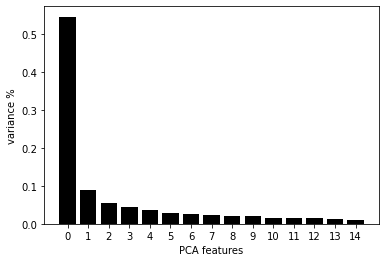

In [29]:
# Variance of principal components
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Text(0, 0.5, 'cumulative explained variance')

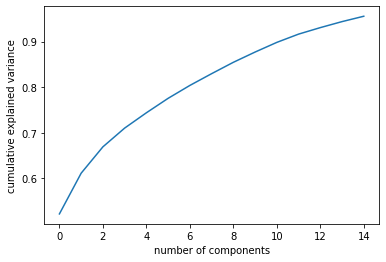

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<h2> Hyperparamter Tuning </h2>

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm_hyper = {'Degree': [1,1,1,2,2,2,3,3,3],
        'Coef0': [2,3,4,2,3,4,2,3,4],
        'Accuracy': []
        }
for cc in svm_hyper['Coef0']:
    for dd in svm_hyper['Degree']:
        clf = SVC(kernel='poly', degree = dd, coef0 = cc)
        scoring = "accuracy"
        start = datetime.now()
        scores = cross_val_score(clf, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
        end = datetime.now()
        #svm_hyper['Time'].apend((end-start).total_seconds())
        svm_hyper['Accuracy'].apend(scores.mean())
        print("cc: " + str(cc) + ", dd: " + str(dd), end = " ")
        print(scoring + ": %0.4f"%(scores.mean(), end = " ")
        print("Time: %.3f"%((end-start).total_seconds())

In [ ]:
svm_report_df = pd.DataFrame(svm_hyper, columns = list(svm_hyper))

In [4]:
svm_hyper = {'Degree': [1,1,1,2,2,2,3,3,3],
        'Coef0': [2,3,4,2,3,4,2,3,4],
        'Accuracy': [0.2182,0.2330,0.2476,0.2220,0.2408,0.2653,0.2238,0.2458,0.2818]
        }
df = pd.DataFrame(svm_hyper, columns = ['Degree', 'Coef0', 'Accuracy'])
df

,Degree,Coef0,Accuracy
0,1,2,0.2182
1,1,3,0.2330
2,1,4,0.2476
3,2,2,0.2220
4,2,3,0.2408
5,2,4,0.2653
6,3,2,0.2238
7,3,3,0.2458
8,3,4,0.2818


### K-Nearest Neighbors

In [80]:
results_w_kt = {'neighbors':{}}
for i in [1,2,3,4,5,6,7,8,16,32,64,128,256,512,1024]:
    knn = KNeighborsClassifier(n_neighbors = i,weights ='distance', algorithm='kd_tree')
    scoring="accuracy"
    scores = cross_val_score(knn, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
    results_w_kt["neighbors"][i] = scores.mean()
    print("Neighbors: " + str(i) + " " + scoring + ": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
print(str(results_w_kt))

In [81]:
results_w_bt = {'neighbors':{}}
for i in [1,2,3,4,5,6,7,8,16,32,64,128,256,512,1024]:
    knn = KNeighborsClassifier(n_neighbors = i,weights ='distance', algorithm='ball_tree')
    scoring="accuracy"
    scores = cross_val_score(knn, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
    results_w_bt["neighbors"][i] = scores.mean()
    print("Neighbors: " + str(i) + " " + scoring + ": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
print(str(results_w_bt))

In [47]:
results_w = {'neighbors':{}}
for i in [1,2,3,4,5,6,7,8,16,32,64,128,256,512,1024]:
    knn = KNeighborsClassifier(n_neighbors = i,weights="distance", algorithm='auto')
    scoring="accuracy"
    scores = cross_val_score(knn, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
    results_w["neighbors"][i] = scores.mean()
    print("Neighbors: " + str(i) + " " + scoring + ": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
print(str(results_w))

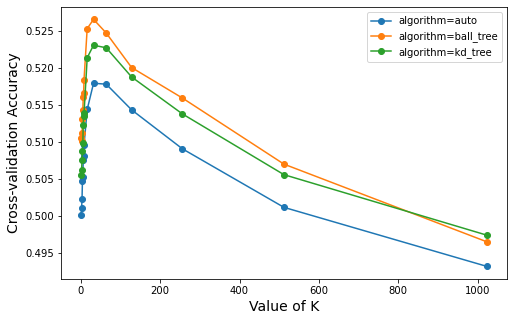

In [50]:
# KNN with different algorithms such as KD-tree and Ball-Tree

auto = {'neighbors': {1: 0.5000500000000001, 2: 0.5011, 3: 0.5022499999999999, 4: 0.50465, 5: 0.505225, 6: 0.507475, 7: 0.508025, 8: 0.50955, 16: 0.514375, 32: 0.5179250000000001, 64: 0.5178, 128: 0.514325, 256: 0.50905, 512: 0.501125, 1024: 0.49312500000000004}}
ball = {'neighbors': {1: 0.510575, 2: 0.5112249999999999, 3: 0.5100750000000001, 4: 0.5131500000000001, 5: 0.5143000000000001, 6: 0.516, 7: 0.51655, 8: 0.5184, 16: 0.5253249999999999, 32: 0.526575, 64: 0.5247250000000001, 128: 0.52005, 256: 0.515925, 512: 0.5069750000000001, 1024: 0.49645}}
kd = {'neighbors': {1: 0.5055, 2: 0.5062249999999999, 3: 0.5075749999999999, 4: 0.50875, 5: 0.509875, 6: 0.5122250000000002, 7: 0.5134749999999999, 8: 0.51385, 16: 0.5213750000000001, 32: 0.523075, 64: 0.522725, 128: 0.518775, 256: 0.5137750000000001, 512: 0.50555, 1024: 0.49734999999999996}}

%matplotlib inline
plt.plot(list(auto['neighbors'].keys()), list(auto['neighbors'].values()), marker='o', label="algorithm=auto")
plt.plot(list(ball['neighbors'].keys()), list(ball['neighbors'].values()), marker='o', label="algorithm=ball_tree")
plt.plot(list(kd['neighbors'].keys()), list(kd['neighbors'].values()), marker='o', label="algorithm=kd_tree")
plt.xlabel('Value of K', fontsize=14)
plt.ylabel('Cross-validation Accuracy', fontsize=14)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.savefig("knn_tuning.jpg", dpi=200)

### Random Forest Classifier


In [46]:
import datetime
time_rfc = []
acc_rfc = []
estimators_rfc = [1,2,3,4,5,6,7,8,16,32,64,128,256,512,1024]
for i in estimators_rfc:
    classifier = RandomForestClassifier(n_estimators = i)
    scoring="accuracy"
    start = datetime.datetime.now()
    scores = cross_val_score(classifier, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
    end = datetime.datetime.now()
    time_rfc.append((end-start).total_seconds())
    acc_rfc.append(scores.mean())
    print("Estimators: " + str(i) + ", Time: " + str((end-start).total_seconds()) + scoring + ": %0.4f" % (scores.mean()))

Estimators: 1, Time: 0.737226accuracy: 0.4164
Estimators: 2, Time: 1.400947accuracy: 0.4227
Estimators: 3, Time: 2.048585accuracy: 0.4681
Estimators: 4, Time: 2.651693accuracy: 0.4959
Estimators: 5, Time: 3.346546accuracy: 0.5162
Estimators: 6, Time: 3.994217accuracy: 0.5225
Estimators: 7, Time: 4.680271accuracy: 0.5337
Estimators: 8, Time: 5.295587accuracy: 0.5386
Estimators: 16, Time: 10.620138accuracy: 0.5665
Estimators: 32, Time: 21.412027accuracy: 0.5840
Estimators: 64, Time: 41.600489accuracy: 0.5959
Estimators: 128, Time: 83.876279accuracy: 0.6024
Estimators: 256, Time: 168.25558accuracy: 0.6076
Estimators: 512, Time: 336.064354accuracy: 0.6071
Estimators: 1024, Time: 674.345705accuracy: 0.6098


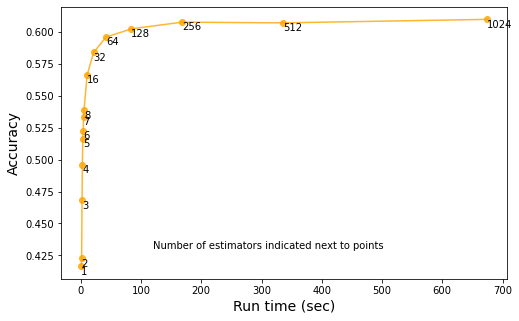

In [48]:
%matplotlib inline
plt.plot(time_rfc, acc_rfc, marker='o', alpha=0.8, color='orange')
plt.xlabel('Run time (sec)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title("")
for i, txt in enumerate(estimators_rfc):
    plt.annotate(txt, (time_rfc[i], acc_rfc[i]), horizontalalignment='left', verticalalignment='top')
plt.annotate("Number of estimators indicated next to points", (120,0.43))
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.savefig("rfc_tuning.jpg", dpi=200)

## Testing Models

### KNN

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 150,weights ='distance')
knn.fit(train_X, np.asarray(train_Y.values.ravel()))
Y_pred = knn.predict(test_X)
accuracy = accuracy_score(test_Y, Y_pred)
print(classification_report(test_Y, Y_pred))

              precision    recall  f1-score   support

           1       0.71      0.85      0.77      1753
           2       0.69      0.84      0.76      1843
           3       0.69      0.71      0.70      1868
           4       0.65      0.77      0.70      1718
           5       0.74      0.94      0.83      1837
           6       0.71      0.32      0.44      1788
           7       0.71      0.67      0.69      1845
           8       0.78      0.80      0.79      1785
           9       0.67      0.47      0.55      1782
          10       0.58      0.56      0.57      1781

    accuracy                           0.69     18000
   macro avg       0.69      0.69      0.68     18000
weighted avg       0.69      0.69      0.68     18000



In [14]:
accuracies=[]
neighbors=[]
for i in range(10,250,10):
    knn = KNeighborsClassifier(n_neighbors = i,weights="distance")
    knn.fit(train_X, np.asarray(train_Y.values.ravel()))
    Y_pred = knn.predict(test_X)
    accuracy = accuracy_score(test_Y, Y_pred)
    neighbors.append(i)
    accuracies.append(accuracy)
    print ("Neighbour:", i, " Accuracy:",accuracy)

Neighbour: 10  Accuracy: 0.6896666666666667
Neighbour: 20  Accuracy: 0.6937777777777778
Neighbour: 30  Accuracy: 0.6947777777777778
Neighbour: 40  Accuracy: 0.6938888888888889
Neighbour: 50  Accuracy: 0.6957777777777778
Neighbour: 60  Accuracy: 0.695
Neighbour: 70  Accuracy: 0.6935555555555556
Neighbour: 80  Accuracy: 0.6941666666666667
Neighbour: 90  Accuracy: 0.6931666666666667
Neighbour: 100  Accuracy: 0.6926666666666667
Neighbour: 110  Accuracy: 0.6922777777777778
Neighbour: 120  Accuracy: 0.6912777777777778
Neighbour: 130  Accuracy: 0.6913888888888889
Neighbour: 140  Accuracy: 0.6915
Neighbour: 150  Accuracy: 0.6918888888888889
Neighbour: 160  Accuracy: 0.6918333333333333
Neighbour: 170  Accuracy: 0.6913888888888889
Neighbour: 180  Accuracy: 0.6914444444444444
Neighbour: 190  Accuracy: 0.6908888888888889
Neighbour: 200  Accuracy: 0.6900555555555555
Neighbour: 210  Accuracy: 0.6894444444444444
Neighbour: 220  Accuracy: 0.6893888888888889
Neighbour: 230  Accuracy: 0.6891111111111111

In [ ]:
%matplotlib inline
plt.plot(neighbors, accuracies)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

<h2> Random Forest Classifier </h2>

In [84]:
classifier = RandomForestClassifier(n_estimators = 128)
classifier.fit(train_X, np.asarray(train_Y.values.ravel()))
Y_pred = classifier.predict(test_X)
accuracy = accuracy_score(test_Y, Y_pred)
print(classification_report(test_Y, Y_pred))

              precision    recall  f1-score   support

           1       0.80      0.87      0.83      1753
           2       0.80      0.86      0.83      1843
           3       0.75      0.76      0.76      1868
           4       0.73      0.77      0.75      1718
           5       0.88      0.96      0.91      1837
           6       0.65      0.53      0.59      1788
           7       0.73      0.75      0.74      1845
           8       0.86      0.84      0.85      1785
           9       0.64      0.57      0.60      1782
          10       0.67      0.64      0.65      1781

    accuracy                           0.76     18000
   macro avg       0.75      0.75      0.75     18000
weighted avg       0.75      0.76      0.75     18000



In [34]:
estimators=[]
accuracies=[]
for i in range(5,250,5):    
    classifier = RandomForestClassifier(n_estimators = i)
    classifier.fit(train_X, np.asarray(train_Y.values.ravel()))
    Y_pred = classifier.predict(test_X)
    accuracy = accuracy_score(test_Y, Y_pred)
    estimators.append(i)
    accuracies.append(accuracy)
    print ("Estimators:", i, " Accuracy:",accuracy)

Estimators: 5  Accuracy: 0.6858888888888889
Estimators: 10  Accuracy: 0.7166111111111111
Estimators: 15  Accuracy: 0.7252777777777778
Estimators: 20  Accuracy: 0.7315
Estimators: 25  Accuracy: 0.7356111111111111
Estimators: 30  Accuracy: 0.7397222222222222
Estimators: 35  Accuracy: 0.7395
Estimators: 40  Accuracy: 0.742
Estimators: 45  Accuracy: 0.7464444444444445
Estimators: 50  Accuracy: 0.7438333333333333
Estimators: 55  Accuracy: 0.7453333333333333
Estimators: 60  Accuracy: 0.7450555555555556
Estimators: 65  Accuracy: 0.7457777777777778
Estimators: 70  Accuracy: 0.7506666666666667
Estimators: 75  Accuracy: 0.7482777777777778
Estimators: 80  Accuracy: 0.7455
Estimators: 85  Accuracy: 0.7487777777777778
Estimators: 90  Accuracy: 0.7483888888888889
Estimators: 95  Accuracy: 0.7506111111111111
Estimators: 100  Accuracy: 0.7482222222222222
Estimators: 105  Accuracy: 0.7500555555555556
Estimators: 110  Accuracy: 0.7495555555555555
Estimators: 115  Accuracy: 0.7492222222222222
Estimators:

Text(0, 0.5, 'Testing Accuracy')

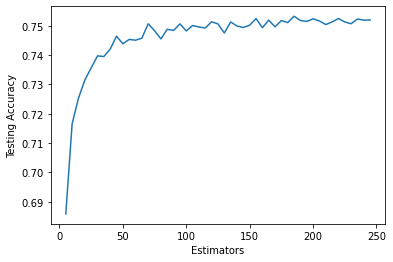

In [35]:
%matplotlib inline
plt.plot(estimators, accuracies)
plt.xlabel('Estimators')
plt.ylabel('Testing Accuracy')

<h2> SVM </h2>

In [ ]:
# from sklearn.svm import SVC
# classifier = SVC(kernel="poly",degree=3,coef0=4)
# classifier.fit(train_X, np.asarray(train_Y.values.ravel()))
# Y_pred = classifier.predict(test_X)
# accuracy = accuracy_score(test_Y, Y_pred)
# print(classification_report(test_Y, Y_pred))

<h2> Accuracy variation with Samples </h2>

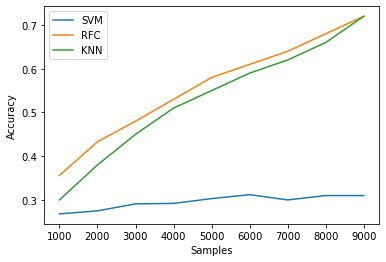

In [1]:
import matplotlib.pyplot as plt
Samples=[1000,2000,3000,4000,5000,6000,7000,8000,9000]
SVM=[0.268,0.275,0.291,0.292,0.303,0.312,0.30,0.31,0.31]
RFC=[0.356,0.433,0.48,0.53,0.58,0.61,0.64,0.68,0.72]
KNN= [0.30,0.38,0.45,0.51,0.55,0.59,0.62,0.66,0.72]

plt.plot(Samples, SVM)
plt.plot(Samples, RFC)
plt.plot(Samples, KNN)
plt.xlabel('Samples')
plt.ylabel('Accuracy')
plt.legend(['SVM', 'RFC', 'KNN'], loc='upper left')
plt.savefig("acc",dpi=200)
plt.show()

<h2> Comparirsion of models </h2>

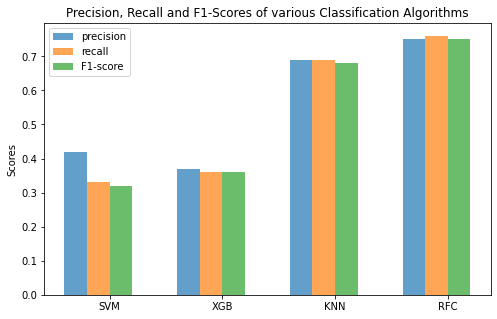

In [5]:
labels = ['SVM', 'XGB', 'KNN', 'RFC']
recall = [0.33, 0.36, 0.69, 0.76]
precision = [0.42, 0.37, 0.69, 0.75]
accuracy = [0.32, 0.36, 0.68, 0.75]

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2), precision, width/3, label='precision',alpha=0.7)
rects2 = ax.bar(x - (width/6), recall, width/3, label='recall',alpha=0.7)
rects2 = ax.bar(x + (width/6), accuracy, width/3, label='F1-score', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall and F1-Scores of various Classification Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.set_size_inches(8, 5)
plt.savefig("final_scores.jpg", dpi=200)

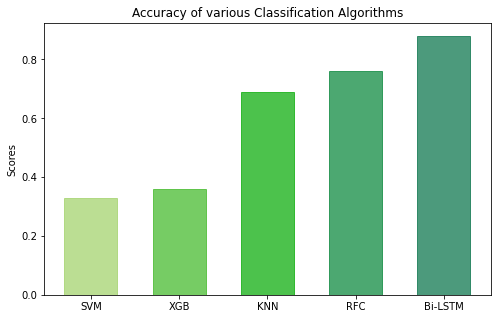

In [6]:
labels = ['SVM', 'XGB', 'KNN', 'RFC', 'Bi-LSTM']
accuracy = [0.33, 0.36, 0.69, 0.76, 0.88]

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(labels, accuracy, 0.6, alpha=0.7,color="#DEEDCF")
rects[0].set_color('#9FD166')
rects[1].set_color('#3CB722')
rects[2].set_color('#00A900')
rects[3].set_color('#008335')
rects[4].set_color('#006F45')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy of various Classification Algorithms')
ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()
fig.set_size_inches(8, 5)
plt.savefig("final_acc.jpg", dpi=200)